In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
name = None

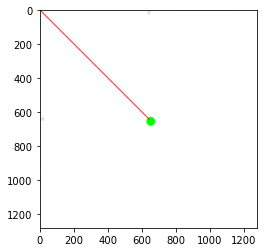

In [10]:
image = cv.imread("Sample1.png",1)
image = cv.line(image, (0,0),(642,642),(255,0,0),3) 
plt.imshow(image,cmap='gray')
plt.show()
shapes ={}


In [3]:
def shape(approx):
        if len(approx) == 3:
            shape = "Triangle"
        
        elif len(approx) == 4:
            #Call rect() to detect the shape
            # angle,op_angle,cong_diag,op_side_eq,all_sides_cong = rect(c)

            # #If opposite angles and sides are equal and diagonals are congruent, it must be a parallelogram
            # if op_angle and op_side_eq and cong_diag:
            #     #If all angles and sides are equal, aspect ratio is 1 and diagonals are congruent, it must be a square
            #     if angle and cong_diag and all_sides_cong:
            #         shape='Square'
            #     elif not(angle) or not(cong_diag) and all_sides_cong:
            #         #If aspect ratio is not 1 and angles are not 90, it must be a rhombus
            #         shape = 'Rhombus'
            #     #Otherwise, its a parallelogram
            #     else:
            shape = 'Parallelogram'
            #If diagonals are not congruent, aspect ratio is not 1, opposite angles are not equal and
            #all angles are not 90 degrees, it is a trapezium
            # elif not(cong_diag) and not(angle) or not(op_angle):
            #     shape='Trapezium'
            # #Otherwise, it is a quadrilateral
            # else: shape='Quadrilateral'
        #Pentagon if shape has 5 sides
        elif len(approx) == 5:
            shape = "Pentagon"
        #Hexagon if shape has 6 sides
        elif len(approx) == 6:
            shape = "Hexagon"
        # otherwise, we assume the shape is a circle
        else:
            shape = "Circle"
        return shape

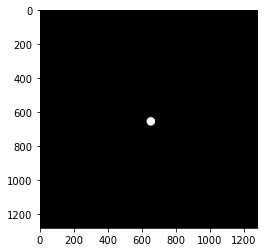

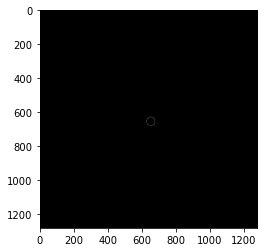

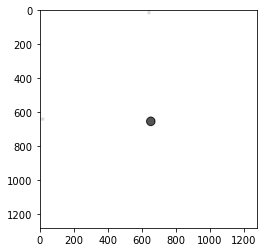

Circle
Circle
{'Circle': [None, 649, 653]}


In [5]:

    # output = image.copy()
image = cv.GaussianBlur(image,(7,7), -1)
ret,thresh1 = cv.threshold(image,127,255,cv.THRESH_BINARY_INV)
plt.imshow(thresh1,cmap='gray')
plt.show()
edges = cv.Canny(thresh1,40,200)
cnts = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(edges,cmap='gray')
plt.show()

if len(cnts) == 2:
        cnts = cnts[0]
elif len(cnts) == 3:
        cnts = cnts[1]
img = cv.drawContours(image,cnts, -1, (0,255,0), 3)
cv.imwrite("cnts.png",img)
plt.imshow(img,cmap='gray')
plt.show()
for cnt in cnts:
        M = cv.moments(cnt)
        cX = int((M["m10"] / M["m00"])) #X co-ordinate of the centroid of the shape
        cY = int((M["m01"] / M["m00"])) #Y co-ordinate of the centroid of the shape
        peri = cv.arcLength(cnt, True)
        approx = cv.approxPolyDP(cnt, 0.001 * peri, True)
        area=cv.contourArea((cnt))
        print(shape(approx))
        if shape(approx) =='Circle':
            # print(cX, cY)
            # print(len(approx), area)
            shapes['Circle'] =[None,cX,cY]
print(shapes)


In [4]:
for cnt in cnts:
        M = cv.moments(cnt)
        cX = int((M["m10"] / M["m00"])) #X co-ordinate of the centroid of the shape
        cY = int((M["m01"] / M["m00"])) #Y co-ordinate of the centroid of the shape
        peri = cv.arcLength(cnt, True)
        approx = cv.approxPolyDP(cnt, 0.001 * peri, True)
        area=cv.contourArea((cnt))
        print(shape(approx))
        if shape(approx) =='Circle':
            # print(cX, cY)
            # print(len(approx), area)
            shapes['Circle'] =[None,cX,cY]
print(shapes)

NameError: name 'cnts' is not defined